In [1]:
# importation of python libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 



In [2]:
df = pd.read_csv('Superstore.csv', encoding='Unicode_escape')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
# calculating number of null values in column postal code 

null_count = df['Postal Code'].isnull().sum()
print(null_count)

0


In [7]:
# filling null values   
df["Postal Code"].fillna(0, inplace = True) 

df['Postal Code'] = df['Postal Code'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int32  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking for duplicates 

In [5]:
if df.duplicated().sum() > 0:  # 
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


# Exploratory Data Analysis 
## Customer Analysis 

In [6]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


### Customer segmentation 

- Group customers based on segments 

In [7]:
# Types of customers

types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [8]:
# Number of customers in each segment 

customer_segmentation = df ['Segment'].value_counts().reset_index().rename(columns={'Segment': 'Customer Type', 'count': 'Total Customers'})

print(customer_segmentation)

  Customer Type  Total Customers
0      Consumer             5191
1     Corporate             3020
2   Home Office             1783


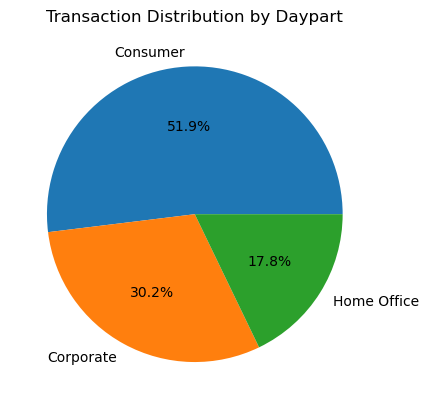

In [123]:
# Plotting a pie chart 

# method. 1
labels = customer_segmentation ['Customer Type']
values = customer_segmentation ['Total Customers']

plt.pie(values, labels=labels, autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Transaction Distribution by Daypart')

plt.show()

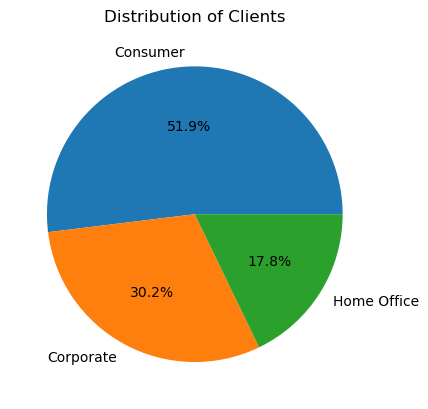

In [9]:
# Method 2
plt.pie(customer_segmentation['Total Customers'], labels=customer_segmentation['Customer Type'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Distribution of Clients')
plt.show()


In [70]:
# Customers and Sales 

# Group the data by the "Segment" column and calculate the total sales for each segment

sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Customer Type', 'Sales': 'Total Sales'})

print(sales_per_segment)

  Customer Type   Total Sales
0      Consumer  1.161401e+06
1     Corporate  7.061464e+05
2   Home Office  4.296531e+05


In [10]:
# Ploting a bar graph

plt.bar(sales_per_segment['Customer Type'], sales_per_segment['Total Sales'])

# Labels
plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

plt.show()


NameError: name 'sales_per_segment' is not defined

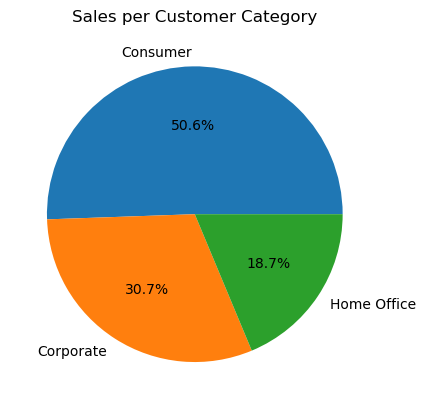

In [72]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Customer Type'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Sales per Customer Category')
plt.show()

### Customer Loyalty
- Examine the repeat purchase behavior of customers 

In [11]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
# Group the data by Customer ID, Customer Name, Segments, and calculate the frequency of orders for each customer
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

In [13]:
# Rename the column to represent the frequency of orders
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

In [14]:
# Identify repeat customers (customers with order frequency greater than 1)
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]

In [15]:
# Sort "repeat_customers" in descending order based on the "Order Frequency" column
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)

In [16]:
# Print the result- the first 10 and reset index
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            37
1     PP-18955           Paul Prost  Home Office            34
2     JL-15835             John Lee     Consumer            34
3     MA-17560         Matt Abelman  Home Office            34
4     SV-20365          Seth Vernon     Consumer            32
5     JD-15895     Jonathan Doherty    Corporate            32
6     CK-12205  Chloris Kastensmidt     Consumer            32
7     EH-13765         Edward Hooks    Corporate            32
8     EP-13915           Emily Phan     Consumer            31
9     ZC-21910     Zuschuss Carroll     Consumer            31
10    AP-10915       Arthur Prichep     Consumer            31
11    LC-16870        Lena Cacioppo     Consumer            30


### Sales by Customer 
- Identify top-spending customers based on their total purchase amount 

In [17]:
# Group the data by customer IDs and calculate the total purchase (sales) for each customer
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# Sort the customers based on their total purchase in descending order to identify top spenders
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

# Print the top-spending customers
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


### Shipping 

In [18]:
# Types of Shipping methods 

types_of_customers = df['Ship Mode'].unique()
print(types_of_customers)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [19]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [20]:
# Frequency of use of a shipping methods 

shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'Ship Mode':'Mode_of_Shipment', 'count': 'Use Frequency'})

print(shipping_model)


  Mode_of_Shipment  Use Frequency
0   Standard Class           5968
1     Second Class           1945
2      First Class           1538
3         Same Day            543


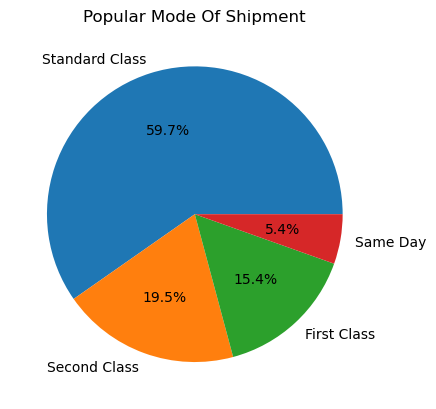

In [21]:
# Plotting a Pie chart

plt.pie(shipping_model['Use Frequency'], labels=shipping_model['Mode_of_Shipment'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Popular Mode Of Shipment')
plt.show()


### Geographical Analysis

In [22]:
# Customers per state 

state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index':'State', 'State':'Number_of_customers'})

print(state.head(20))

   Number_of_customers  count
0           California   2001
1             New York   1128
2                Texas    985
3         Pennsylvania    587
4           Washington    506
5             Illinois    492
6                 Ohio    469
7              Florida    383
8             Michigan    255
9       North Carolina    249
10             Arizona    224
11            Virginia    224
12             Georgia    184
13           Tennessee    183
14            Colorado    182
15             Indiana    149
16            Kentucky    139
17       Massachusetts    135
18          New Jersey    130
19              Oregon    124


In [23]:
# Customers per city 

city = df['City'].value_counts().reset_index()
city= city.rename(columns={'index':'City', 'City':'Number_of_customers'})

print(city.head(15))

   Number_of_customers  count
0        New York City    915
1          Los Angeles    747
2         Philadelphia    537
3        San Francisco    510
4              Seattle    428
5              Houston    377
6              Chicago    314
7             Columbus    222
8            San Diego    170
9          Springfield    163
10              Dallas    157
11        Jacksonville    125
12             Detroit    115
13              Newark     95
14            Richmond     90


In [24]:
# Sales per state 

# Group the data by state and calculate the total purchases (sales) for each state
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

# Sort the states based on their total sales in descending order to identify top spenders
top_sales = state_sales.sort_values(by='Sales', ascending=False)

# Print the states 
print(top_sales.head(20).reset_index(drop=True))

             State        Sales
0       California  457687.6315
1         New York  310876.2710
2            Texas  170188.0458
3       Washington  138641.2700
4     Pennsylvania  116511.9140
5          Florida   89473.7080
6         Illinois   80166.1010
7             Ohio   78258.1360
8         Michigan   76269.6140
9         Virginia   70636.7200
10  North Carolina   55603.1640
11         Indiana   53555.3600
12         Georgia   49095.8400
13        Kentucky   36591.7500
14      New Jersey   35764.3120
15         Arizona   35282.0010
16       Wisconsin   32114.6100
17        Colorado   32108.1180
18       Tennessee   30661.8730
19       Minnesota   29863.1500


In [25]:
# Group the data by state and calculate the total purchase (sales) for each city
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

# Sort the cities based on their sales in descending order to identify top cities
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

# Print the states 
print(top_city_sales.head(20).reset_index(drop=True))

             City        Sales
0   New York City  256368.1610
1     Los Angeles  175851.3410
2         Seattle  119540.7420
3   San Francisco  112669.0920
4    Philadelphia  109077.0130
5         Houston   64504.7604
6         Chicago   48539.5410
7       San Diego   47521.0290
8    Jacksonville   44713.1830
9     Springfield   43054.3420
10        Detroit   42446.9440
11       Columbus   38706.2430
12         Newark   28576.1190
13       Columbia   25283.3240
14      Lafayette   25036.2000
15        Jackson   24963.8580
16    San Antonio   21843.5280
17     Burlington   21668.0820
18      Arlington   20214.5320
19         Dallas   20131.9322


In [26]:
state_city_sales = df.groupby(['State','City'])['Sales'].sum().reset_index()

print(state_city_sales.head(20))

      State           City      Sales
0   Alabama         Auburn   1766.830
1   Alabama        Decatur   3374.820
2   Alabama       Florence   1997.350
3   Alabama         Hoover    525.850
4   Alabama     Huntsville   2484.370
5   Alabama         Mobile   5462.990
6   Alabama     Montgomery   3722.730
7   Alabama     Tuscaloosa    175.700
8   Arizona       Avondale    946.808
9   Arizona  Bullhead City     22.288
10  Arizona       Chandler   1076.747
11  Arizona        Gilbert   4172.382
12  Arizona       Glendale   2917.865
13  Arizona           Mesa   4037.740
14  Arizona         Peoria   1341.352
15  Arizona        Phoenix  11000.257
16  Arizona     Scottsdale   1466.307
17  Arizona   Sierra Vista     76.072
18  Arizona          Tempe   1070.302
19  Arizona         Tucson   6313.016


## Product Analysis

### Product Category Analysis

- Investigate the sales performance of different product 

In [27]:
# Types of products in the Stores 

products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [28]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [29]:
# Types of sub category 

product_subcategory = df['Sub-Category'].nunique()
print(product_subcategory)

17


In [30]:
# Group the data by product category and how many sub-category it has 
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
# sort by ascending order
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
# Print the states 
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [31]:
subcategory_count_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

print(subcategory_count_sales)

           Category Sub-Category        Sales
0         Furniture    Bookcases  114879.9963
1         Furniture       Chairs  328449.1030
2         Furniture  Furnishings   91705.1640
3         Furniture       Tables  206965.5320
4   Office Supplies   Appliances  107532.1610
5   Office Supplies          Art   27118.7920
6   Office Supplies      Binders  203412.7330
7   Office Supplies    Envelopes   16476.4020
8   Office Supplies    Fasteners    3024.2800
9   Office Supplies       Labels   12486.3120
10  Office Supplies        Paper   78479.2060
11  Office Supplies      Storage  223843.6080
12  Office Supplies     Supplies   46673.5380
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
15       Technology     Machines  189238.6310
16       Technology       Phones  330007.0540


In [32]:
# Group the data by product category versus the sales from each product category 
product_category = df.groupby(['Category'])['Sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_category = product_category.sort_values(by='Sales', ascending=False) 

# Print the states 
print(top_product_category.reset_index(drop=True))

          Category        Sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


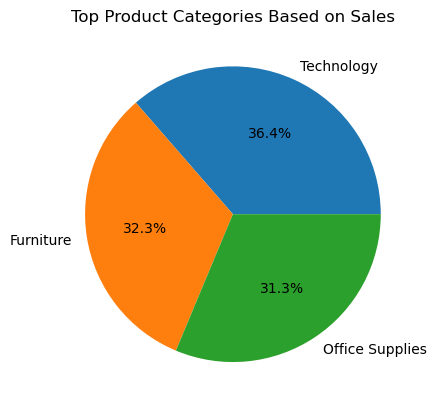

In [33]:
# Plotting a pie chart 
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%')

# set the labels of the pie chart 
plt.title('Top Product Categories Based on Sales')
        
plt.show()


In [34]:
# Group the data by product sub category versus the sales  
product_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_subcategory = product_subcategory.sort_values(by='Sales', ascending=False) 

# Print the states 
print(top_product_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  330007.0540
1        Chairs  328449.1030
2       Storage  223843.6080
3        Tables  206965.5320
4       Binders  203412.7330
5      Machines  189238.6310
6   Accessories  167380.3180
7       Copiers  149528.0300
8     Bookcases  114879.9963
9    Appliances  107532.1610
10  Furnishings   91705.1640
11        Paper   78479.2060
12     Supplies   46673.5380
13          Art   27118.7920
14    Envelopes   16476.4020
15       Labels   12486.3120
16    Fasteners    3024.2800


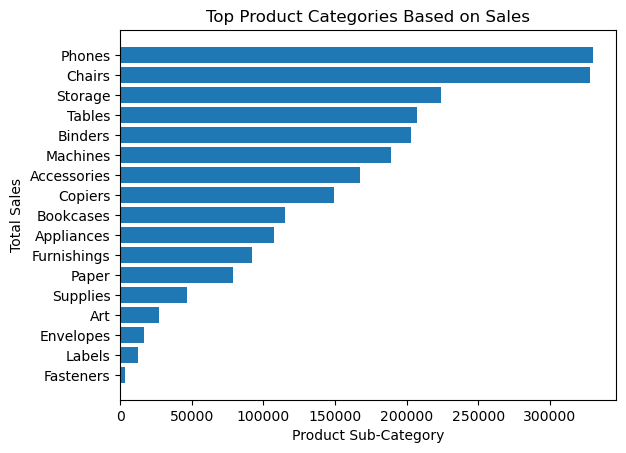

In [35]:

top_product_subcategory = top_product_subcategory.sort_values(by='Sales', ascending=True)

# Ploting a bar graph

plt.barh(top_product_subcategory['Sub-Category'], top_product_subcategory['Sales'])

# Labels
plt.title('Top Product Categories Based on Sales')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()


In [36]:
# Convert the "Order Date" column to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'])

## Sales 

In [37]:
# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales':'Total Sales'})

# yearly_sales = 
# Print the total sales for each year
print(yearly_sales)

   Year  Total Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


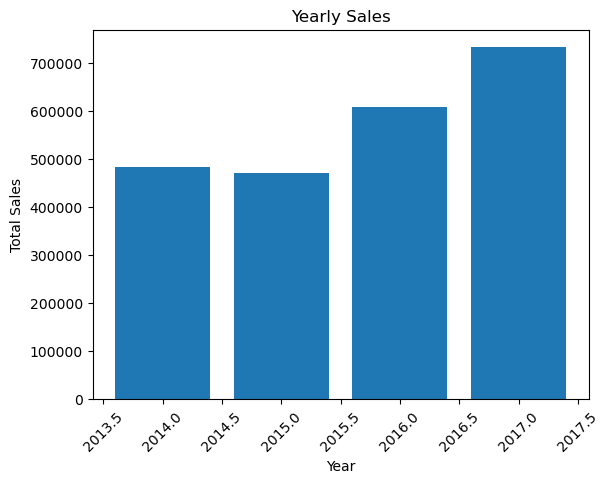

In [38]:
# Ploting a bar graph

plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])

# Labels
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.show()


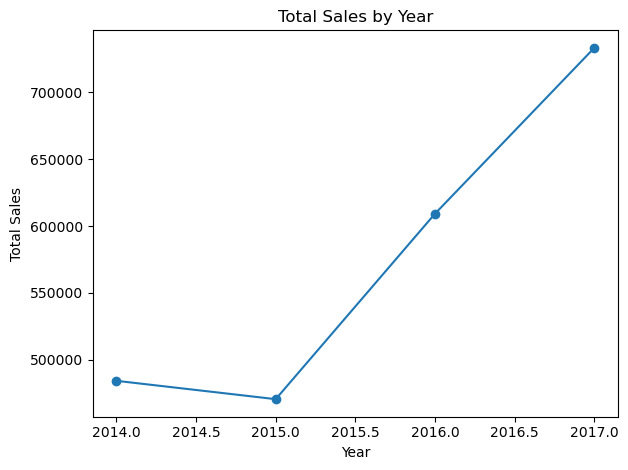

In [39]:
# Create a line graph for total sales by year
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Display the plot
plt.tight_layout()

plt.show()

In [40]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter the data for the year 2018
year_sales = df[df['Order Date'].dt.year == 2017]

# Calculate the quarterly sales for 2017
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales':'Total Sales'})


print("Quarterly Sales for 2017:")
print(quarterly_sales)

Quarterly Sales for 2017:
     Quarter  Total Sales
0 2017-03-31  123144.8602
1 2017-06-30  133764.3720
2 2017-09-30  196251.9560
3 2017-12-31  280054.0670


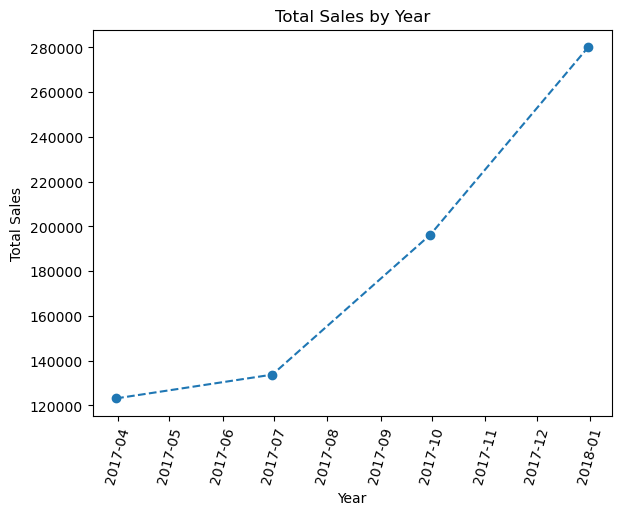

In [41]:
# Create a line graph for total sales by year
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

In [42]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2017
year_sales = df[df['Order Date'].dt.year == 2017]

# Calculate the monthly sales for 2017
monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum()

# Renaming the columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales':'Total Montly Sales'})

# Print the monthly and quarterly sales for 2017
print("Monthly Sales for 2017:")
print(monthly_sales)


Monthly Sales for 2017:
        Month  Total Montly Sales
0  2017-01-31          43971.3740
1  2017-02-28          20301.1334
2  2017-03-31          58872.3528
3  2017-04-30          36521.5361
4  2017-05-31          44261.1102
5  2017-06-30          52981.7257
6  2017-07-31          45264.4160
7  2017-08-31          63120.8880
8  2017-09-30          87866.6520
9  2017-10-31          77776.9232
10 2017-11-30         118447.8250
11 2017-12-31          83829.3188


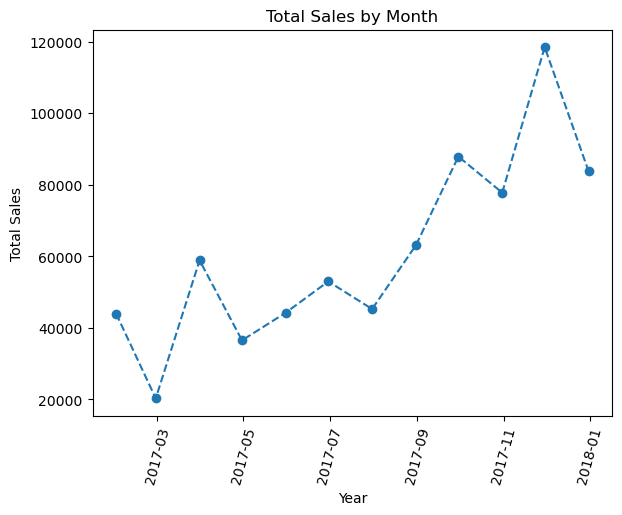

In [43]:
# Create a line graph for total sales by year
plt.plot(monthly_sales['Month'], monthly_sales['Total Montly Sales'], marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

## Sales Trends

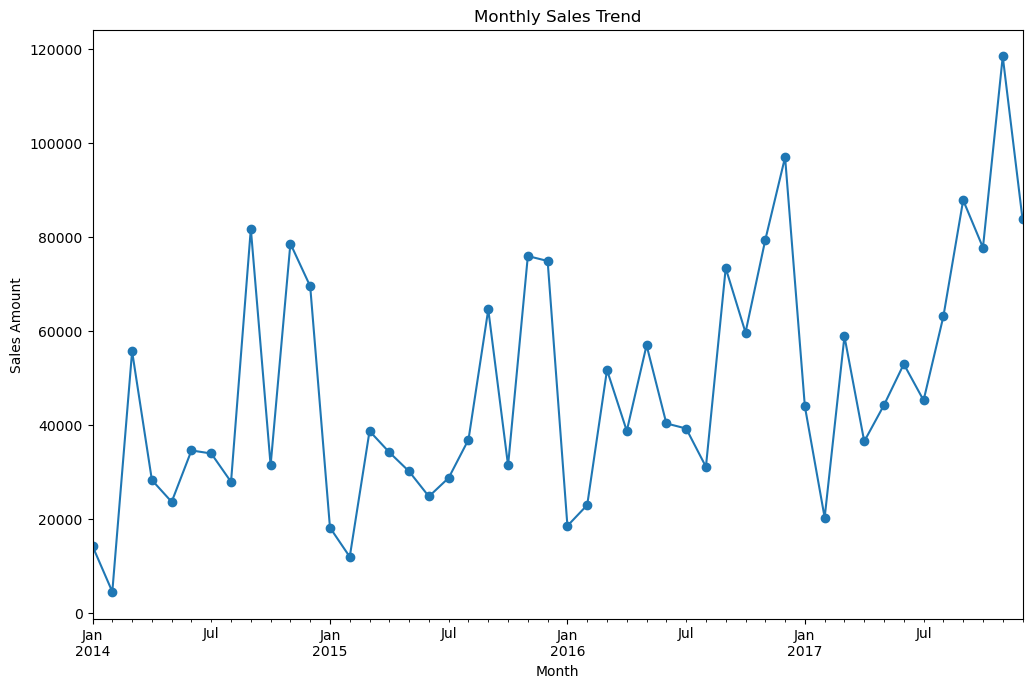

In [44]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by months and calculate the total sales amount for each month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot the sales trends for months
plt.figure(figsize=(12, 26))

# Monthly Sales Trend
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots
# plt.tight_layout()
plt.show()

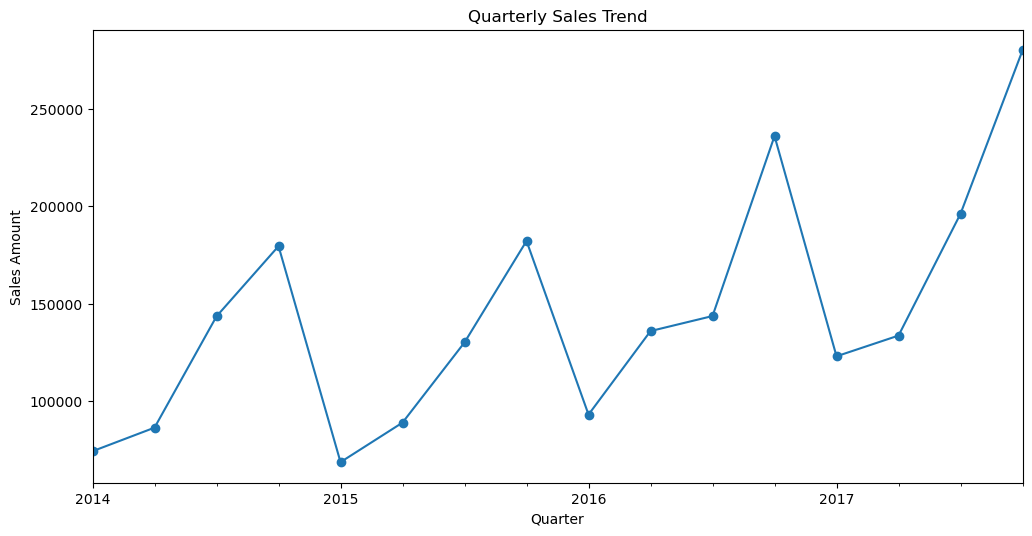

In [45]:
# Assuming you have a DataFrame named "df" with columns "Order Date" and "Sales amount"

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by quarters and calculate the total sales amount for each quarter
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

# Plot the sales trends for months, quarters, and years
plt.figure(figsize=(12, 20))

# Quarterly Sales Trend
plt.subplot(3, 1, 2)
quarterly_sales.plot(kind='line', marker='o')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots
#plt.tight_layout()
plt.show()

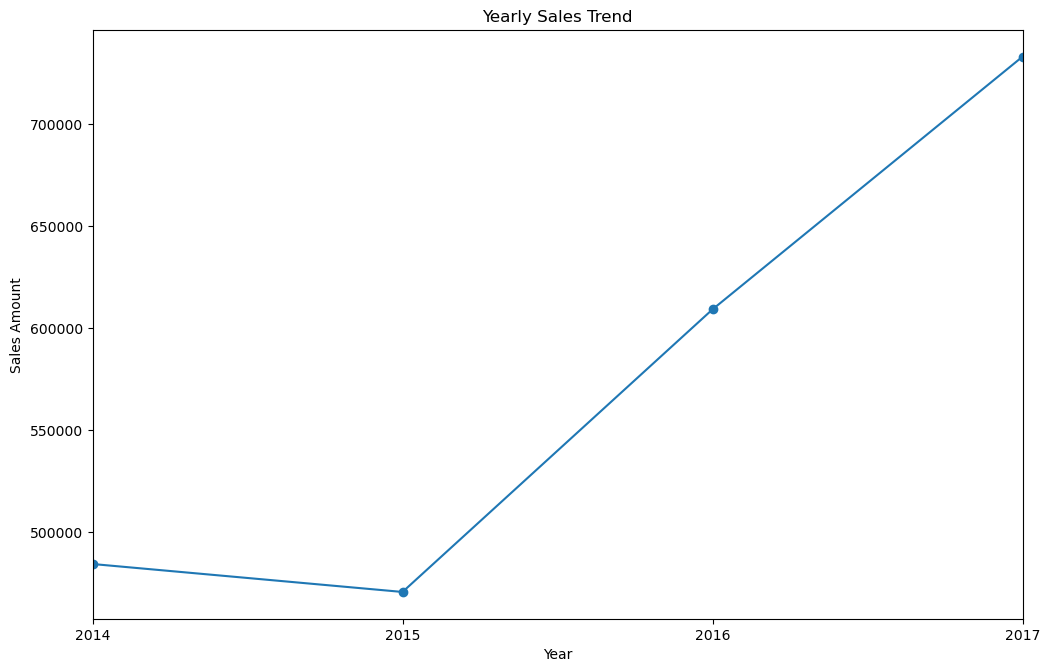

In [46]:
# Assuming you have a DataFrame named "df" with columns "Order Date" and "Sales amount"

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()

# Plot the sales trends for quarters
plt.figure(figsize=(12, 26))

# Yearly Sales Trend
plt.subplot(3, 1, 3)
yearly_sales.plot(kind='line', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots

plt.show()

# Profit

In [47]:
# Group the data by years and calculate the total profit amount for each year
yearly_profit = df.groupby(df['Order Date'].dt.year)['Profit'].sum()

yearly_profit = yearly_profit.reset_index()
yearly_profit = yearly_profit.rename(columns={'Order Date': 'Year', 'Profit':'Total Profit'})

# yearly_sales = 
# Print the total sales for each year
print(yearly_profit)

   Year  Total Profit
0  2014    49543.9741
1  2015    61618.6037
2  2016    81795.1743
3  2017    93439.2696


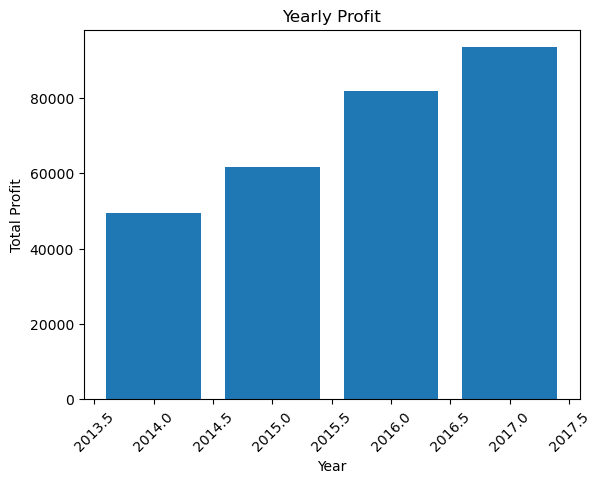

In [48]:
# Ploting a bar graph

plt.bar(yearly_profit['Year'], yearly_profit['Total Profit'])

# Labels
plt.title('Yearly Profit')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

plt.show()

In [49]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2017
year_profit = df[df['Order Date'].dt.year == 2017]

# Calculate the monthly profit for 2017
monthly_profit = year_profit.resample('M', on='Order Date')['Profit'].sum()

# Renaming the columns
monthly_profit = monthly_profit.reset_index()
monthly_profit = monthly_profit.rename(columns={'Order Date':'Month', 'Profit':'Total Montly Profit'})

# Print the monthly and quarterly sales for 2017
print("Monthly Profit for 2017:")
print(monthly_profit)

Monthly Profit for 2017:
        Month  Total Montly Profit
0  2017-01-31            7140.4391
1  2017-02-28            1613.8720
2  2017-03-31           14751.8915
3  2017-04-30             933.2900
4  2017-05-31            6342.5828
5  2017-06-30            8223.3357
6  2017-07-31            6952.6212
7  2017-08-31            9040.9557
8  2017-09-30           10991.5556
9  2017-10-31            9275.2755
10 2017-11-30            9690.1037
11 2017-12-31            8483.3468


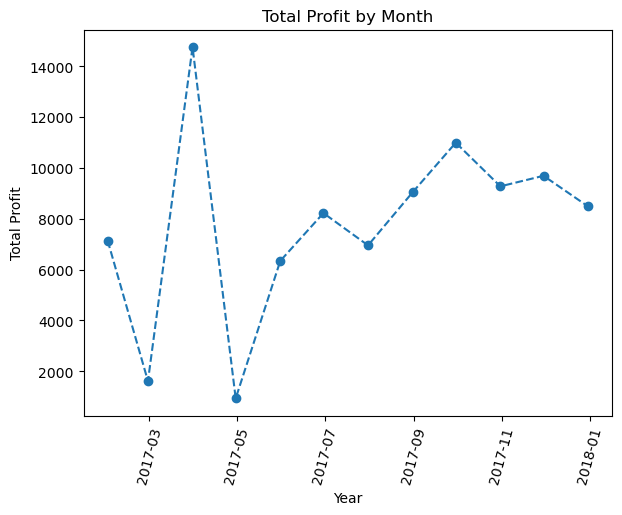

In [50]:
# Create a line graph for total Profit by Month
plt.plot(monthly_profit['Month'], monthly_profit['Total Montly Profit'], marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit by Month')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

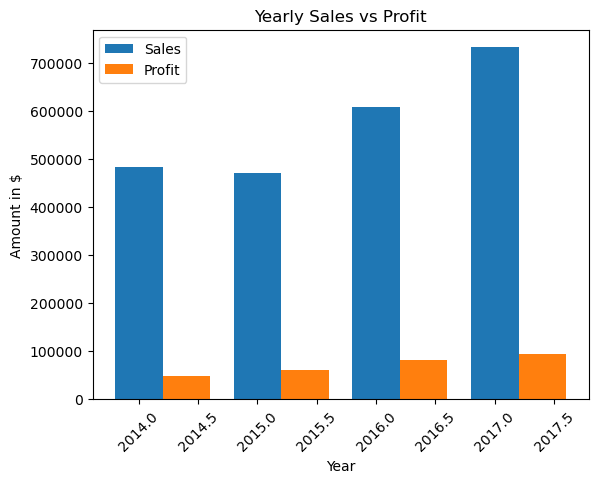

In [51]:
width = 0.4
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales':'Total Sales'})

plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'], width, label='Sales')
plt.bar(yearly_profit['Year']+width, yearly_profit['Total Profit'], width, label='Profit')

# Labels
plt.title('Yearly Sales vs Profit')
plt.xlabel('Year')
plt.ylabel('Amount in $')
plt.xticks(rotation=45)
plt.legend()

plt.show()




# Thanks a lot